In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

In [9]:

# Load and display the dataset for Benin Malanville
benin_data = pd.read_csv("../data/benin-malanville.csv")
benin_data.head()


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [10]:
# Check the data types of each column in the dataset and identify numerical and categorical variables
benin_data.dtypes


Timestamp         object
GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
WD               float64
WDstdev          float64
BP                 int64
Cleaning           int64
Precipitation    float64
TModA            float64
TModB            float64
Comments         float64
dtype: object

In [11]:
# visualize the contents of your dataset with important statistical measures 
benin_data.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


In [ ]:
# calculate percentage of missing and remove columns with high null values
# we can also check and replace missing values in the dataset in non highly null columns
missing_data = benin_data.isna().sum()
total_rows = len(benin_data)
missing_percentage = (missing_data / total_rows) * 100
columns_to_drop = missing_percentage[missing_percentage > 5].index
benin_copy = benin_data.drop(columns=columns_to_drop)
benin_copy = benin_copy.fillna(benin_copy.median())

In [26]:
key_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
outliers = pd.Series(False, index=benin_copy.index)

for col in key_columns:
    if col in benin_copy.columns:
        outlier_flags = np.abs(stats.zscore(benin_copy[col]))
        outliers = outliers | (outlier_flags > 3)

# Add the column ONCE after the loop finishes
benin_copy['Outliers'] = outliers

In [30]:
# export the cleaned data as a csv file
benin_copy.to_csv('../data/benin_data_cleaned.csv', index=False)

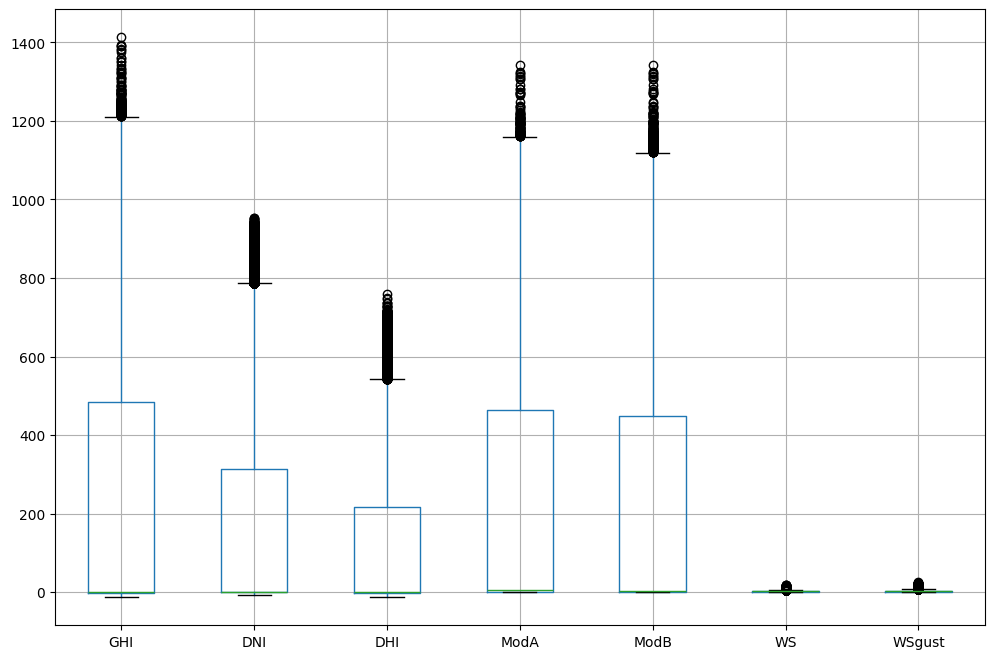

In [31]:
# plot boxplot for numeric cols
benin_copy.boxplot(key_columns,figsize=(12,8));

TIME SERIES ANALYSIS

In [32]:
# convert Timestamp to datetime format
benin_copy['Timestamp']=pd.to_datetime(benin_copy['Timestamp'])
benin_copy.set_index('Timestamp',inplace=True)

TIMESTAMP PLOTS

<Figure size 1500x600 with 0 Axes>

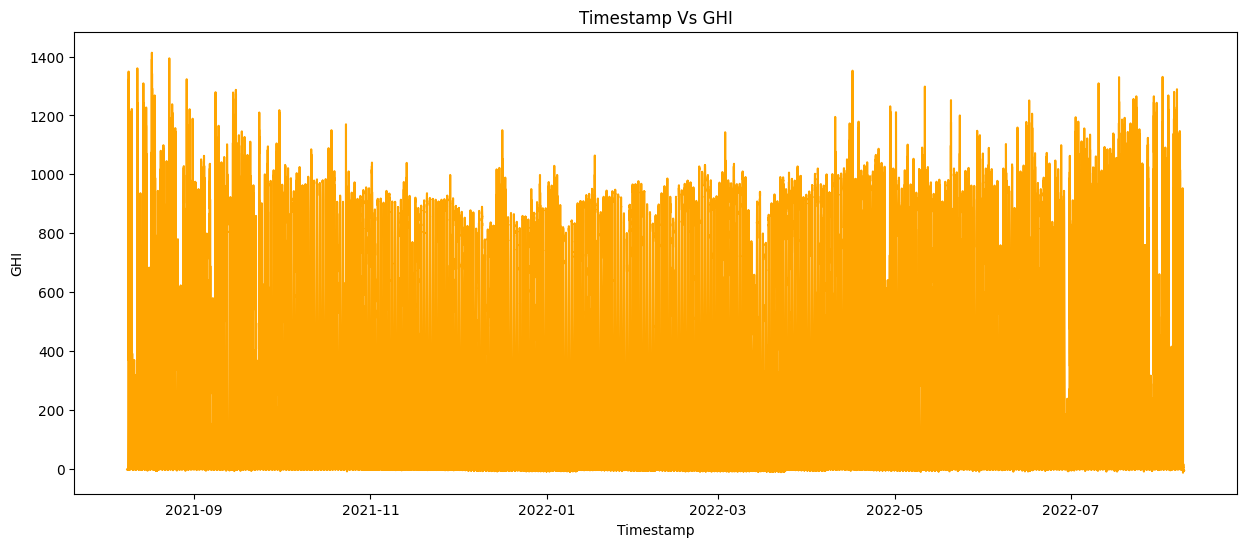

In [34]:
# Timestamp Vs GHI plot
plt.figure(figsize=(15,6))
plt.plot(benin_copy.index,benin_copy["GHI"],color='orange')
plt.title('Timestamp Vs GHI')
plt.xlabel('Timestamp')
plt.ylabel('GHI')
plt.show()

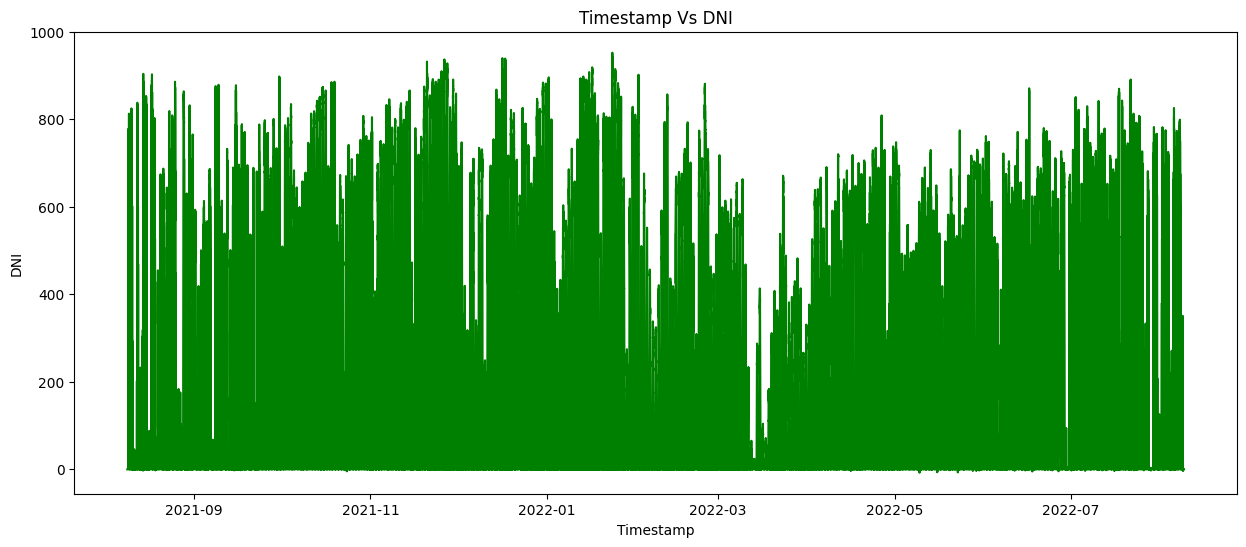

In [35]:
# Timestamp vs DNI plot
plt.figure(figsize=(15,6))
plt.plot(benin_copy.index,benin_copy["DNI"],color='green')
plt.title('Timestamp Vs DNI')
plt.xlabel('Timestamp')
plt.ylabel('DNI')
plt.show()

<Figure size 1500x600 with 0 Axes>

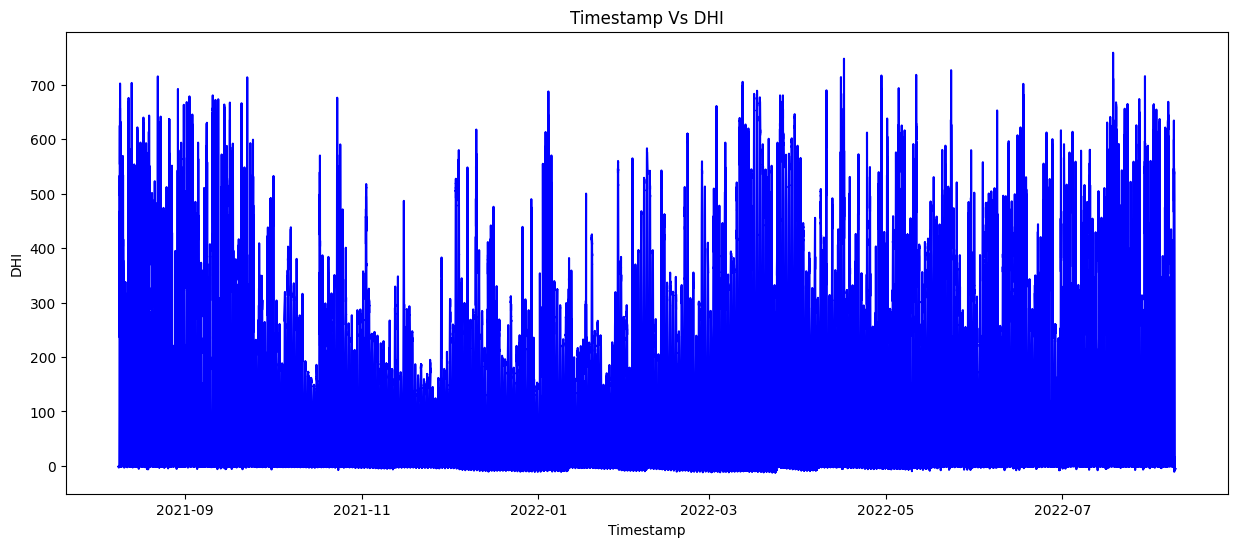

In [37]:
# Timestamp vs DHI plot
plt.figure(figsize=(15,6))
plt.plot(benin_copy.index,benin_copy["DHI"],color='blue')
plt.title('Timestamp Vs DHI')
plt.xlabel('Timestamp')
plt.ylabel('DHI')
plt.show()

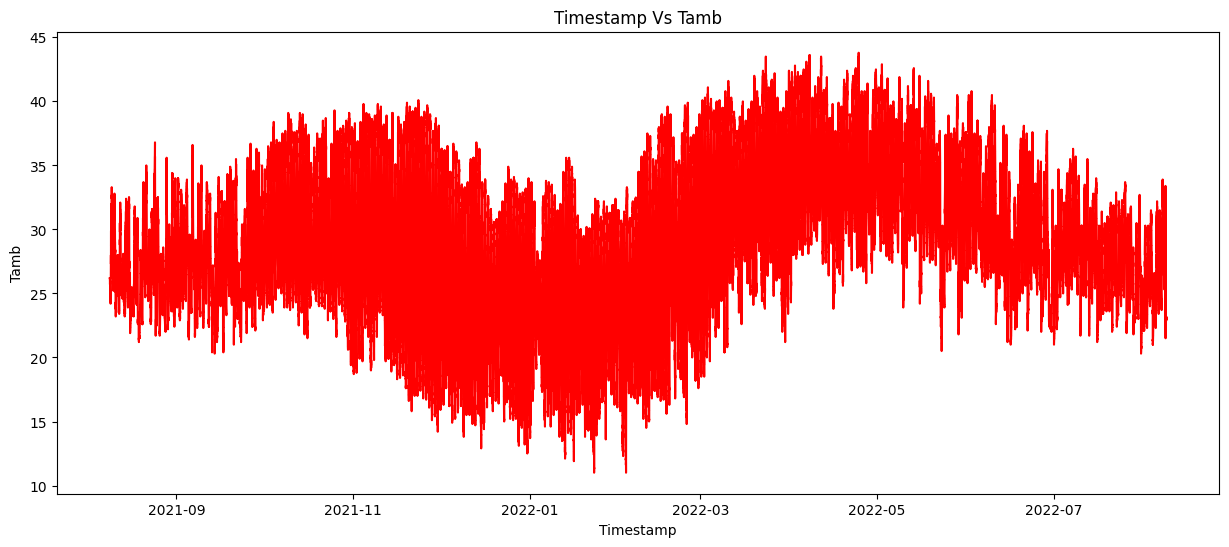

In [38]:
# Timestamp vs Tamb plot
plt.figure(figsize=(15,6))
plt.plot(benin_copy.index,benin_copy["Tamb"],color='red')
plt.title('Timestamp Vs Tamb')
plt.xlabel('Timestamp')
plt.ylabel('Tamb')
plt.show()

In [39]:
# obsernve patterns in months
benin_copy['Month']=benin_copy.index.month # extract month from timestamp
# compute monthly average for numeric columns
monthly_avg=benin_copy.groupby('Month')[key_columns].mean()
monthly_avg

,GHI,DNI,DHI,ModA,ModB,WS,WSgust
Month,,,,,,,
1,236.127899,223.528044,85.099924,258.110289,242.310712,2.446868,3.174438
2,261.717381,183.575208,123.602111,271.789606,251.921992,1.999630,2.598872
3,246.681272,101.955347,159.999859,243.236362,222.428784,1.994261,2.603454
4,268.759785,160.630734,134.699329,250.338377,243.634081,2.843025,3.756144
5,256.238629,147.091293,135.635515,228.603017,224.995822,2.935733,3.878504
6,232.787537,144.552778,118.637521,202.095769,200.385405,2.381544,3.165648
7,222.814444,130.135970,121.314397,196.639830,195.213345,2.365016,3.137677
8,200.085029,99.048864,122.297982,185.433253,185.079034,1.709250,2.345697
9,222.887431,128.179900,122.124169,214.701181,214.852618,1.800822,2.437319


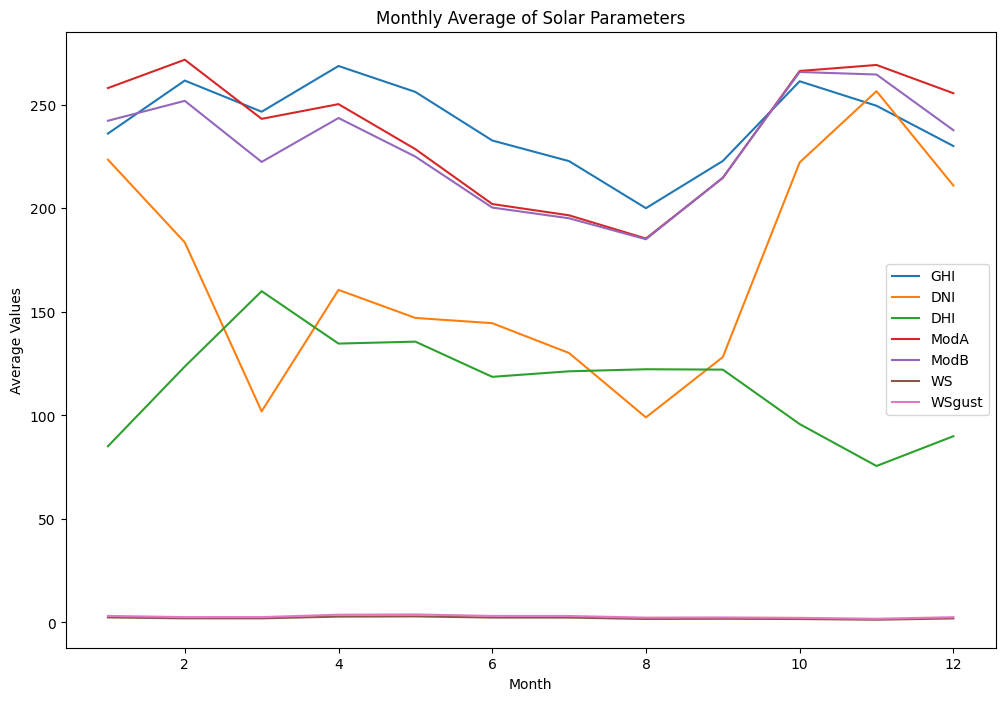

In [40]:
# show monthly pattens plots
monthly_avg.plot(figsize=(12,8))
plt.title('Monthly Average of Solar Parameters')
plt.xlabel('Month')
plt.ylabel('Average Values')
plt.show()

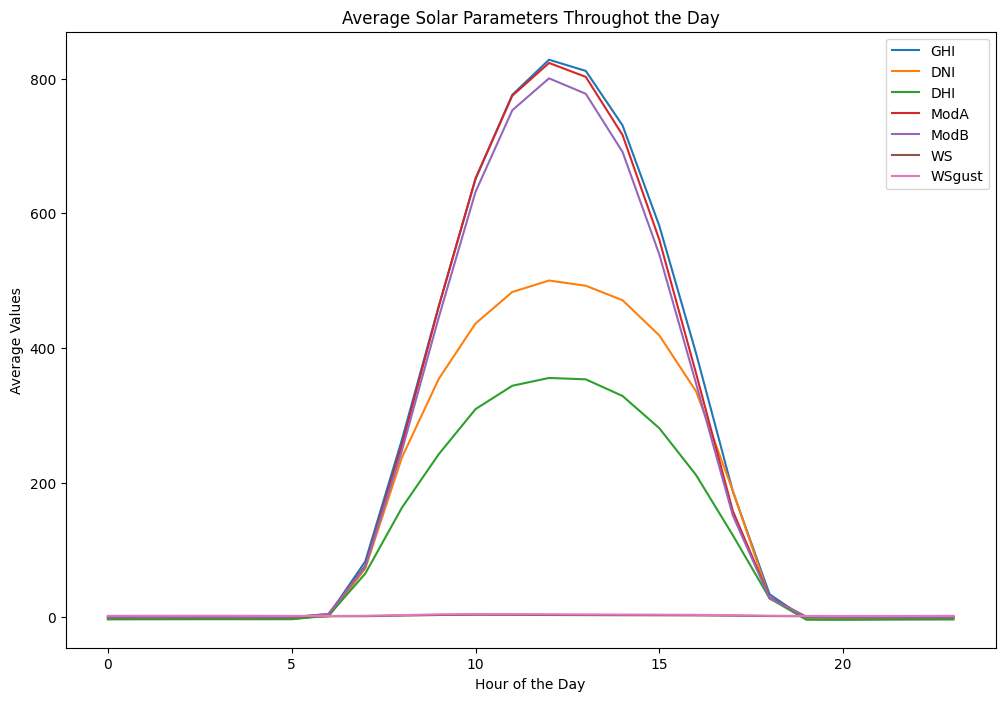

In [41]:
# Trends throughout the day
benin_copy['Hour']=benin_copy.index.hour # extraxt hour from timestamp
daily_avg=benin_copy.groupby('Hour')[key_columns].mean()
daily_avg.plot(figsize=(12,8))
plt.title('Average Solar Parameters Throughot the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Values')
plt.show()

In [42]:
# Detect anomalies in GHI using rolling mean and std deviation
ghi_mean,ghi_std=benin_copy['GHI'].mean(),benin_copy['GHI'].std()
# detect anomalies
benin_copy['GHI_Anomaly']=((benin_copy['GHI']> (ghi_mean + 3*ghi_std)) | (benin_copy['GHI']< (ghi_mean - 3*ghi_std)))

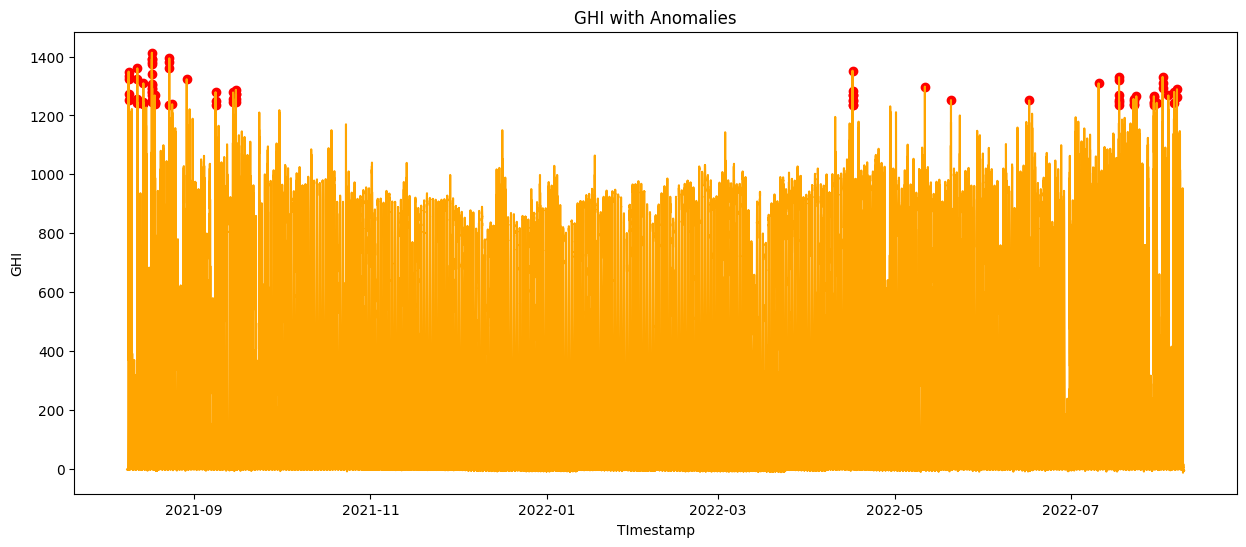

In [43]:
# plot anomalies
plt.figure(figsize=(15,6))
plt.plot(benin_copy.index,benin_copy["GHI"],label='GHI',color='orange')
plt.scatter(benin_copy[benin_copy['GHI_Anomaly']].index, 
    benin_copy[benin_copy['GHI_Anomaly']]['GHI'],
    color='red',label='Anomalies')
plt.title('GHI with Anomalies')
plt.xlabel('TImestamp')
plt.ylabel('GHI')
plt.show()